In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def normalizer(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis=0)
    return(dataset - mu)/sigma

def bias_vector(features,target):
    m = features.shape[0]
    n = features.shape[1]
    f = np.reshape(np.c_[np.ones(m),features],[m,n+1])
    l = np.reshape(target,[m,1])
    return f,l

    
    

In [3]:
normalize = StandardScaler()

boston = load_boston()
feature = boston.data
label = boston.target
normalize_feature = normalize.fit_transform(feature)
f, l = bias_vector(normalize_feature,label)
n = f.shape[1]

In [4]:
train_x,test_x,train_y,test_y = train_test_split(f,l,test_size = 0.25, random_state = 100)

In [5]:
learning_rate = 0.0001
epoch = 20000
log_loss = np.empty(shape=[1],dtype = float)

X = tf.placeholder(tf.float32,shape = [None,n])
y = tf.placeholder(tf.float32,shape=[None,1])
W = tf.Variable(tf.ones([n,1]))

y_ = tf.matmul(X,W)

cost_op = tf.reduce_mean(tf.square(y_ - y))

minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_op)



Instructions for updating:
Use `tf.global_variables_initializer` instead.


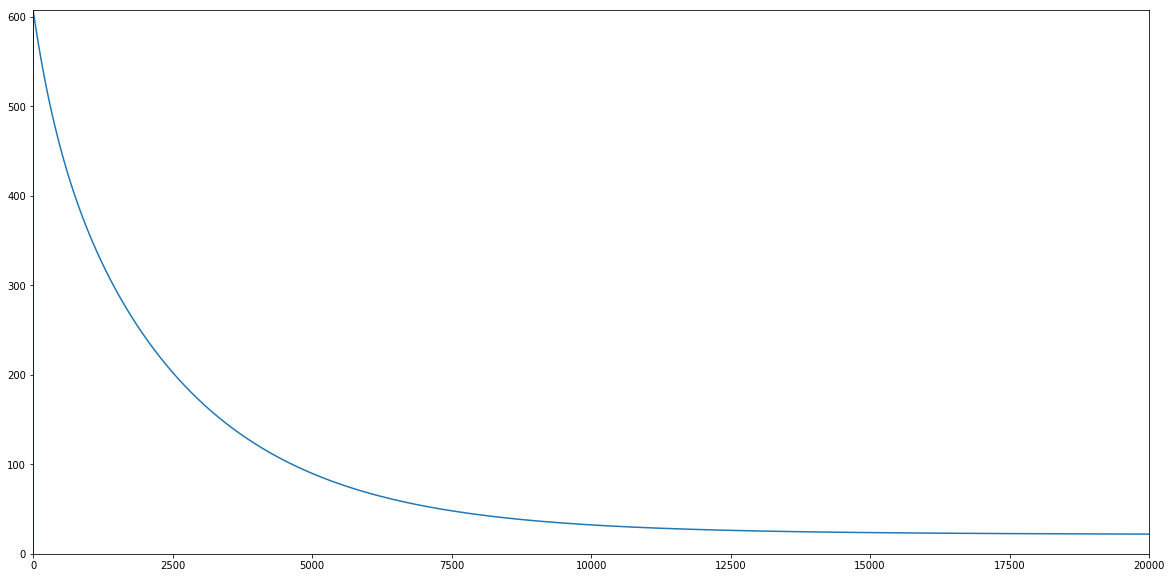

In [6]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
for ep in range(epoch):
    sess.run(minimizer, feed_dict = {X:train_x,y:train_y})
    log_loss = np.append(log_loss, sess.run(cost_op, feed_dict ={X:train_x,y:train_y} ))
plt.figure(figsize=(20,10))
plt.plot(range(len(log_loss)),log_loss,)
plt.axis([0,epoch,0,np.max(log_loss)])
plt.show()
    



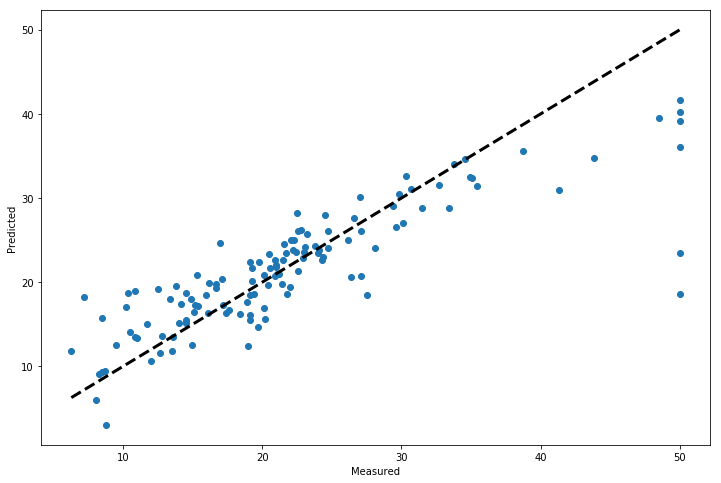

In [7]:
pred_y = sess.run(y_,feed_dict = {X:test_x})

# mse = tf.reduce_mean(tf.square(pred_y,test_y))

# print("MSE %.4f" % sess.run(mse))

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(test_y,pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
# ax.plot(test_y.min(),pred_y.min(),'ro')
# ax.plot(pred_y.min(),pred_y.min(),'bs')
# ax.plot(pred_y.min(),test_y.min(),'g^')
# ax.plot(test_y.min(),test_y.min(),'bo')
# ax.plot(test_y.max(),pred_y.max(),'ro')
# ax.plot(pred_y.max(),pred_y.max(),'bs')
# ax.plot(pred_y.max(),test_y.max(),'g^')
# ax.plot(test_y.max(),test_y.max(),'bo')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted') 
plt.show()
